In [10]:
import os
import re
import pandas as pd

In [ ]:
# Let's define a function to parse the values from the 

In [11]:
def parse_results(f_name: str):
    pattern = r"score_report_(.*?)__top_k:(\d+)__chunk_size:(\d+)\.csv"
    match = re.search(pattern, f_name)
    if match:
        embeddings_model = match.group(1)
        top_k = int(match.group(2))
        chunk_size = int(match.group(3))
        return embeddings_model, top_k, chunk_size
    else:
        print("No match found")

In [19]:
def read_scores(path: str):
    all_scores = []
    for root, dirs, files in os.walk(path):
        for f_name in files:
            if not f_name.startswith("score_report"):
                continue
    
            embeddings_model, top_k, chunk_size = parse_results(f_name)
    
            df = pd.read_csv(path+"/"+f_name)
    
            df.rename(columns={'Unnamed: 0': 'metric'}, inplace=True)
            df_transposed = df.T
            df_transposed.columns = df_transposed.iloc[0]
            df_transposed = df_transposed[1:]
    
            # Add new columns
            df_transposed['embeddings'] = embeddings_model
            df_transposed['top_k'] = top_k
            df_transposed['chunk_size'] = chunk_size
    
            all_scores.append(df_transposed)
    
    df = pd.concat(all_scores)
    df.reset_index(drop=True, inplace=True)
    df.rename_axis(None, axis=1, inplace=True)

    return df

In [20]:
df = read_scores('aragog_results/')

## Let's see all the complete list of parameters and the result for each

In [34]:
df

,context_relevance,faithfulness,sas,embeddings,top_k,chunk_size
0,0.776791,0.698598,0.493805,all-mpnet-base-v2,1,64
1,0.952451,0.948598,0.670742,all-mpnet-base-v2,3,256
2,0.923821,0.903427,0.630241,all-mpnet-base-v2,2,256
3,0.937023,0.859813,0.601499,msmarco-distilroberta-base-v2,1,256
4,0.927793,0.931464,0.641957,all-MiniLM-L6-v2,3,64
5,0.94793,0.891485,0.637332,msmarco-distilroberta-base-v2,2,256
6,0.880659,0.808411,0.559292,all-mpnet-base-v2,1,256
7,0.963915,0.943925,0.640162,msmarco-distilroberta-base-v2,3,256
8,0.88053,0.897196,0.603804,msmarco-distilroberta-base-v2,2,64
9,0.903427,NaN,0.508581,msmarco-distilroberta-base-v2,1,64


## Let's see which embedding model is the best. We aggregate all the parameters by embedding model used, and inspect the boxplots for all the `Semantic Answer Similarity` values

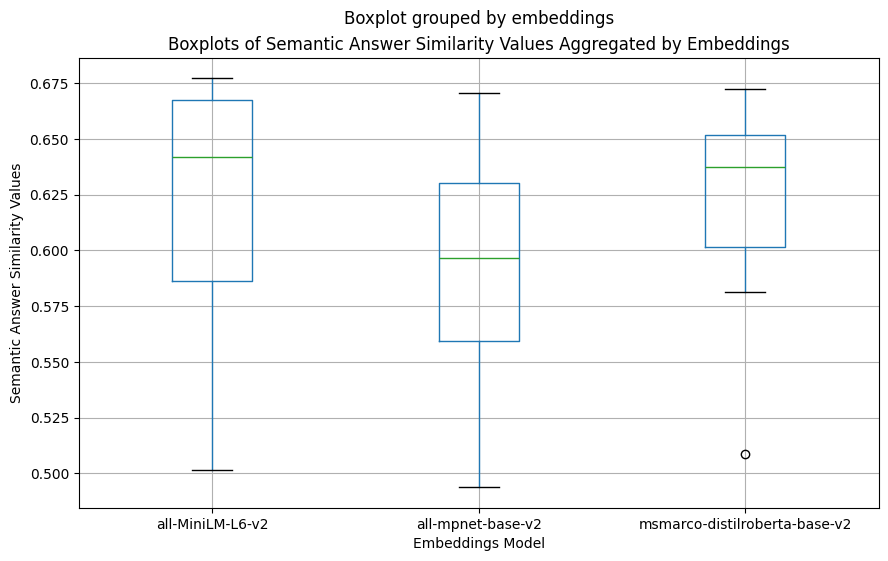

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='sas', by='embeddings', ax=ax)

plt.xlabel("Embeddings Model")
plt.ylabel("Semantic Answer Similarity Values")
plt.title("Boxplots of Semantic Answer Similarity Values Aggregated by Embeddings")

plt.show()

## We can see that the `all-MiniLM-L6-V2` gives the best results overall. Which combination of parameters is the best for this particular embedding model?

In [37]:
filtered_df = df[df['embeddings'] == 'all-MiniLM-L6-v2'].sort_values(by='sas', ascending=False)

In [38]:
filtered_df

,context_relevance,faithfulness,sas,embeddings,top_k,chunk_size
11,NaN,0.948598,0.677247,all-MiniLM-L6-v2,3,128
26,NaN,0.938474,0.675843,all-MiniLM-L6-v2,3,256
24,0.949755,0.962617,0.667561,all-MiniLM-L6-v2,2,256
12,0.920249,0.928037,0.65659,all-MiniLM-L6-v2,2,128
4,0.927793,0.931464,0.641957,all-MiniLM-L6-v2,3,64
22,0.894407,0.884735,0.629849,all-MiniLM-L6-v2,2,64
23,0.893335,0.825234,0.586235,all-MiniLM-L6-v2,1,256
10,0.903645,0.831776,0.568433,all-MiniLM-L6-v2,1,128
21,0.870717,0.672897,0.501648,all-MiniLM-L6-v2,1,64
